# Logistic Regression on the Titanic Dataset

I will be analysing the dataset Titanic from Kaggle found here: https://www.kaggle.com/c/titanic/data?select=train.csv

The dataset has been split into 2: 'train.csv' and 'test.csv'. I will be training the model using the 'train.csv' dataset. The dataset 'test.csv' will contain the same columns as 'train.csv' except for the column 'Survived.' I will use the model trained by 'train.csv' to create predictions whether passengers survived for the dataset 'test.csv.'

I will first explore the dataset using Matplotlib and Seaborn and then I will build a Logistic Regression Model first using Scikit-Learn and then purely from Numpy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

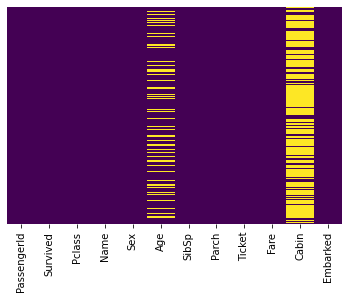

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It appears that the 'Age' coloumn is missing about 20% of its values and the 'Cabin' column is missing most of its data. The model cannot be trained with any missing values. To use the 'Age' column, dummy variables can be used instead like the mean age of all passengers.

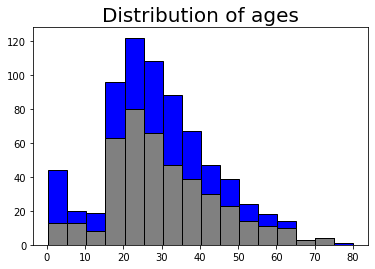

In [7]:
plt.hist(df.Age, bins=16, ec='black', histtype='bar', stacked=True, color='blue')
plt.hist(df.Age[df['Survived']==0], bins=16, ec='black',  histtype='bar', stacked=True, range=(df.Age.min(),df.Age.max()), color='grey')

plt.title('Distribution of ages', fontsize=20)

plt.rcParams["figure.figsize"] = (11,7)

## Data Cleaning

This section involves me transforming the data to be usable in training the model. Columns such as 'Sex' which contain object type values cannot be used to train the model. Hence I will need to transform the data to float or int types.

In [8]:
df.Sex = df.Sex.replace({'female':0, 'male':1})

In [9]:
def transform_embarked(x):
    
    if x == 'S':
        return 0
    
    elif x == 'C':
        return 1
    
    else:
        return 2

In [10]:
df.Embarked = df.Embarked.apply(transform_embarked)

In [11]:
print('Mean Age of Pclass 1 are ' + str(int(df.Age[df['Pclass']==1].mean())))
print('Mean Age of Pclass 2 are ' + str(int(df.Age[df['Pclass']==2].mean())))
print('Mean Age of Pclass 3 are ' + str(int(df.Age[df['Pclass']==3].mean())))

Mean Age of Pclass 1 are 38
Mean Age of Pclass 2 are 29
Mean Age of Pclass 3 are 25


In [12]:
def add_age(column):
    
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        elif Pclass == 3:
            return 25
        
    else:
        return Age

In [13]:
df.Age = df[['Age', 'Pclass']].apply(add_age,axis=1)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0


For columns 'Sex' and 'Embarked' I have replaced their string values to corresponding int values. For example, for 'Sex', I have replaced female with 0 and male with 1.

For the column 'Age', I have chosen to input the mean of the corresponding 'Pclass' of the passenger. For example, a passenger with missing age values, who has a Pclass of 2 will be given the age of 29.

## Training a Logistic Regression Model (using Scikit-Learn)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin'])
y = df.Survived

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33)

I have chosen to create a validation dataset by splitting 'train.csv' to X_train which holds 67% of the dataset and the X_validation which holds the remaining 33% of the dataset.

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 245 to 71
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Sex          596 non-null    int64  
 3   Age          596 non-null    float64
 4   SibSp        596 non-null    int64  
 5   Parch        596 non-null    int64  
 6   Fare         596 non-null    float64
 7   Embarked     596 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 41.9 KB


In [18]:
y_train.shape

(596,)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logmodel = LogisticRegression()

In [21]:
logmodel.fit(X_train, y_train)

/Users/danelindiongco/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions = logmodel.predict(X_validation)

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_validation, predictions))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       190
           1       0.72      0.63      0.67       105

    accuracy                           0.78       295
   macro avg       0.76      0.75      0.75       295
weighted avg       0.78      0.78      0.78       295



Here the model has achieved an accuracy of 80% compared to the validation dataset.

## Training a Logistic Regression Model (using Numpy)

 First I will convert the panda dataframes into numpy arrays

In [25]:
X_train_n = X_train.values
X_validation_n = X_validation.values
y_train_n = y_train.values.reshape(X_train_n.shape[0],1)
y_validation_n = y_validation.values.reshape(X_validation_n.shape[0],1)

In [26]:
print('Training set has shape: ' + str(X_train_n.shape))
print('Validation set has shape: ' + str(X_validation_n.shape))

print(y_train_n.shape)
print(y_validation_n.shape)

Training set has shape: (596, 8)
Validation set has shape: (295, 8)
(596, 1)
(295, 1)


This step involves preprocessing the data by subtracting the mean from the dataset and then dividing by the standard deviation.

In [27]:
X_train_n = (X_train_n - X_train_n.mean(axis=1).reshape(596,1))/np.std(X_train_n,axis=1).reshape(596,1)
X_validation_n = (X_validation_n - X_validation_n.mean(axis=1).reshape(295,1))/np.std(X_validation_n,axis=1).reshape(295,1)
print(X_train_n.shape)
print(X_validation_n.shape)

(596, 8)
(295, 8)


In [28]:
def sigmoid(z): #This function finds the sigmoid of the array. It will be used to find the activation function of 'z = Xw + b'.
    a = 1/(1+np.exp(-z))
    
    return a

In [29]:
def initialise_with_zero(dims): 
    
    w = np.zeros((dims,1))
    b = 0.0
    
    return w, b

In [30]:
def propagate(w, b, X, Y): #This function finds the activation function and cost of the model using forward propagation.
    #The results are then used to calculate the gradients by backward propagation.
    
    #Forward propagation
    m = X.shape[0]
    
    a = sigmoid(np.dot(X,w) + b) #calculates activation
    
    cost = (-1/m) * np.sum((Y * np.log(a)) + ((1-Y) * np.log(1-a)))
    
    #Gradients initialised by Backward propagation
    dw = np.dot(X.T,(a-Y))/m
    
    db = np.sum(a-Y)/m

    
    cost = np.squeeze(np.array(cost))
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [31]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009): 
    #In this function we conduct gradient descent
    
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    w_list = []
    dw_list = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)     
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        if i % 100 == 0:
            costs.append(cost)
            w_list.append(w[0])
            dw_list.append(dw[0])
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
        
    return params, grads, costs, w_list, dw_list

In [32]:
def predict(w, b, X):
    #This funtion is used to create a list of predictions on the X values using the parameters w & b
    
    m = X.shape[0]
    y_hat = np.zeros((m,1))
    w = w.reshape(X.shape[1], 1)
    
    A = sigmoid(np.dot(X,w)+b)
    
    for i in range(A.shape[0]):
        
        if A[i,0] > 0.5:
            y_hat[i,0] = int(1)
        else:
            y_hat[i,0] = int(0)
    
    y_hat = y_hat.round(decimals=0).astype(object)
    return y_hat

In [33]:
def logistic_regression_model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    #Merging all the functions together
    
    w, b = initialise_with_zero(X_train_n.shape[1])

    params, grads, costs, w_list, dw_list = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params['w']
    b = params['b']
    
    prediction_train = predict(w, b, X_train)
    prediction_validation = predict(w, b, X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_validation - Y_test)) * 100))
    
    d = {"costs": costs,
         "prediction_validation": prediction_validation, 
         "prediction_train" : prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations, 
         "w_list" : w_list,
         "dw_list" : dw_list}
    
    return d

In [34]:
logmodel_n = logistic_regression_model(X_train_n, y_train_n, X_validation_n, y_validation_n, num_iterations=1000001, learning_rate=1)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.666881
Cost after iteration 200: 0.663237
Cost after iteration 300: 0.661142
Cost after iteration 400: 0.659501
Cost after iteration 500: 0.658126
Cost after iteration 600: 0.656963
Cost after iteration 700: 0.655973
Cost after iteration 800: 0.655112
Cost after iteration 900: 0.654339
Cost after iteration 1000: 0.653625
Cost after iteration 1100: 0.652951
Cost after iteration 1200: 0.652309
Cost after iteration 1300: 0.651694
Cost after iteration 1400: 0.651101
Cost after iteration 1500: 0.650530
Cost after iteration 1600: 0.649976
Cost after iteration 1700: 0.649439
Cost after iteration 1800: 0.648917
Cost after iteration 1900: 0.648409
Cost after iteration 2000: 0.647914
Cost after iteration 2100: 0.647430
Cost after iteration 2200: 0.646958
Cost after iteration 2300: 0.646496
Cost after iteration 2400: 0.646043
Cost after iteration 2500: 0.645600
Cost after iteration 2600: 0.645166
Cost after iteration 2700: 0.644740
Cost

Cost after iteration 24100: 0.610580
Cost after iteration 24200: 0.610510
Cost after iteration 24300: 0.610441
Cost after iteration 24400: 0.610371
Cost after iteration 24500: 0.610302
Cost after iteration 24600: 0.610234
Cost after iteration 24700: 0.610165
Cost after iteration 24800: 0.610097
Cost after iteration 24900: 0.610030
Cost after iteration 25000: 0.609962
Cost after iteration 25100: 0.609895
Cost after iteration 25200: 0.609828
Cost after iteration 25300: 0.609762
Cost after iteration 25400: 0.609696
Cost after iteration 25500: 0.609630
Cost after iteration 25600: 0.609564
Cost after iteration 25700: 0.609499
Cost after iteration 25800: 0.609434
Cost after iteration 25900: 0.609369
Cost after iteration 26000: 0.609305
Cost after iteration 26100: 0.609240
Cost after iteration 26200: 0.609177
Cost after iteration 26300: 0.609113
Cost after iteration 26400: 0.609050
Cost after iteration 26500: 0.608987
Cost after iteration 26600: 0.608924
Cost after iteration 26700: 0.608861
C

Cost after iteration 46400: 0.600267
Cost after iteration 46500: 0.600236
Cost after iteration 46600: 0.600206
Cost after iteration 46700: 0.600176
Cost after iteration 46800: 0.600146
Cost after iteration 46900: 0.600116
Cost after iteration 47000: 0.600086
Cost after iteration 47100: 0.600057
Cost after iteration 47200: 0.600027
Cost after iteration 47300: 0.599997
Cost after iteration 47400: 0.599968
Cost after iteration 47500: 0.599939
Cost after iteration 47600: 0.599909
Cost after iteration 47700: 0.599880
Cost after iteration 47800: 0.599851
Cost after iteration 47900: 0.599822
Cost after iteration 48000: 0.599793
Cost after iteration 48100: 0.599765
Cost after iteration 48200: 0.599736
Cost after iteration 48300: 0.599707
Cost after iteration 48400: 0.599679
Cost after iteration 48500: 0.599650
Cost after iteration 48600: 0.599622
Cost after iteration 48700: 0.599594
Cost after iteration 48800: 0.599566
Cost after iteration 48900: 0.599538
Cost after iteration 49000: 0.599510
C

Cost after iteration 68700: 0.595336
Cost after iteration 68800: 0.595320
Cost after iteration 68900: 0.595305
Cost after iteration 69000: 0.595289
Cost after iteration 69100: 0.595273
Cost after iteration 69200: 0.595257
Cost after iteration 69300: 0.595242
Cost after iteration 69400: 0.595226
Cost after iteration 69500: 0.595211
Cost after iteration 69600: 0.595195
Cost after iteration 69700: 0.595180
Cost after iteration 69800: 0.595164
Cost after iteration 69900: 0.595149
Cost after iteration 70000: 0.595134
Cost after iteration 70100: 0.595118
Cost after iteration 70200: 0.595103
Cost after iteration 70300: 0.595088
Cost after iteration 70400: 0.595073
Cost after iteration 70500: 0.595057
Cost after iteration 70600: 0.595042
Cost after iteration 70700: 0.595027
Cost after iteration 70800: 0.595012
Cost after iteration 70900: 0.594997
Cost after iteration 71000: 0.594982
Cost after iteration 71100: 0.594967
Cost after iteration 71200: 0.594953
Cost after iteration 71300: 0.594938
C

Cost after iteration 92300: 0.592530
Cost after iteration 92400: 0.592521
Cost after iteration 92500: 0.592513
Cost after iteration 92600: 0.592504
Cost after iteration 92700: 0.592495
Cost after iteration 92800: 0.592487
Cost after iteration 92900: 0.592478
Cost after iteration 93000: 0.592469
Cost after iteration 93100: 0.592461
Cost after iteration 93200: 0.592452
Cost after iteration 93300: 0.592444
Cost after iteration 93400: 0.592435
Cost after iteration 93500: 0.592426
Cost after iteration 93600: 0.592418
Cost after iteration 93700: 0.592409
Cost after iteration 93800: 0.592401
Cost after iteration 93900: 0.592393
Cost after iteration 94000: 0.592384
Cost after iteration 94100: 0.592376
Cost after iteration 94200: 0.592367
Cost after iteration 94300: 0.592359
Cost after iteration 94400: 0.592351
Cost after iteration 94500: 0.592342
Cost after iteration 94600: 0.592334
Cost after iteration 94700: 0.592326
Cost after iteration 94800: 0.592317
Cost after iteration 94900: 0.592309
C

Cost after iteration 114100: 0.591030
Cost after iteration 114200: 0.591024
Cost after iteration 114300: 0.591019
Cost after iteration 114400: 0.591014
Cost after iteration 114500: 0.591008
Cost after iteration 114600: 0.591003
Cost after iteration 114700: 0.590998
Cost after iteration 114800: 0.590993
Cost after iteration 114900: 0.590987
Cost after iteration 115000: 0.590982
Cost after iteration 115100: 0.590977
Cost after iteration 115200: 0.590972
Cost after iteration 115300: 0.590966
Cost after iteration 115400: 0.590961
Cost after iteration 115500: 0.590956
Cost after iteration 115600: 0.590951
Cost after iteration 115700: 0.590946
Cost after iteration 115800: 0.590941
Cost after iteration 115900: 0.590936
Cost after iteration 116000: 0.590930
Cost after iteration 116100: 0.590925
Cost after iteration 116200: 0.590920
Cost after iteration 116300: 0.590915
Cost after iteration 116400: 0.590910
Cost after iteration 116500: 0.590905
Cost after iteration 116600: 0.590900
Cost after i

Cost after iteration 136000: 0.590098
Cost after iteration 136100: 0.590094
Cost after iteration 136200: 0.590091
Cost after iteration 136300: 0.590088
Cost after iteration 136400: 0.590084
Cost after iteration 136500: 0.590081
Cost after iteration 136600: 0.590078
Cost after iteration 136700: 0.590074
Cost after iteration 136800: 0.590071
Cost after iteration 136900: 0.590068
Cost after iteration 137000: 0.590064
Cost after iteration 137100: 0.590061
Cost after iteration 137200: 0.590058
Cost after iteration 137300: 0.590055
Cost after iteration 137400: 0.590051
Cost after iteration 137500: 0.590048
Cost after iteration 137600: 0.590045
Cost after iteration 137700: 0.590042
Cost after iteration 137800: 0.590038
Cost after iteration 137900: 0.590035
Cost after iteration 138000: 0.590032
Cost after iteration 138100: 0.590029
Cost after iteration 138200: 0.590026
Cost after iteration 138300: 0.590022
Cost after iteration 138400: 0.590019
Cost after iteration 138500: 0.590016
Cost after i

Cost after iteration 158500: 0.589492
Cost after iteration 158600: 0.589490
Cost after iteration 158700: 0.589488
Cost after iteration 158800: 0.589486
Cost after iteration 158900: 0.589484
Cost after iteration 159000: 0.589481
Cost after iteration 159100: 0.589479
Cost after iteration 159200: 0.589477
Cost after iteration 159300: 0.589475
Cost after iteration 159400: 0.589473
Cost after iteration 159500: 0.589471
Cost after iteration 159600: 0.589469
Cost after iteration 159700: 0.589467
Cost after iteration 159800: 0.589465
Cost after iteration 159900: 0.589463
Cost after iteration 160000: 0.589460
Cost after iteration 160100: 0.589458
Cost after iteration 160200: 0.589456
Cost after iteration 160300: 0.589454
Cost after iteration 160400: 0.589452
Cost after iteration 160500: 0.589450
Cost after iteration 160600: 0.589448
Cost after iteration 160700: 0.589446
Cost after iteration 160800: 0.589444
Cost after iteration 160900: 0.589442
Cost after iteration 161000: 0.589440
Cost after i

Cost after iteration 180900: 0.589104
Cost after iteration 181000: 0.589103
Cost after iteration 181100: 0.589101
Cost after iteration 181200: 0.589100
Cost after iteration 181300: 0.589099
Cost after iteration 181400: 0.589097
Cost after iteration 181500: 0.589096
Cost after iteration 181600: 0.589095
Cost after iteration 181700: 0.589093
Cost after iteration 181800: 0.589092
Cost after iteration 181900: 0.589090
Cost after iteration 182000: 0.589089
Cost after iteration 182100: 0.589088
Cost after iteration 182200: 0.589086
Cost after iteration 182300: 0.589085
Cost after iteration 182400: 0.589084
Cost after iteration 182500: 0.589082
Cost after iteration 182600: 0.589081
Cost after iteration 182700: 0.589080
Cost after iteration 182800: 0.589078
Cost after iteration 182900: 0.589077
Cost after iteration 183000: 0.589076
Cost after iteration 183100: 0.589074
Cost after iteration 183200: 0.589073
Cost after iteration 183300: 0.589072
Cost after iteration 183400: 0.589070
Cost after i

Cost after iteration 203400: 0.588849
Cost after iteration 203500: 0.588848
Cost after iteration 203600: 0.588848
Cost after iteration 203700: 0.588847
Cost after iteration 203800: 0.588846
Cost after iteration 203900: 0.588845
Cost after iteration 204000: 0.588844
Cost after iteration 204100: 0.588843
Cost after iteration 204200: 0.588842
Cost after iteration 204300: 0.588841
Cost after iteration 204400: 0.588840
Cost after iteration 204500: 0.588839
Cost after iteration 204600: 0.588838
Cost after iteration 204700: 0.588838
Cost after iteration 204800: 0.588837
Cost after iteration 204900: 0.588836
Cost after iteration 205000: 0.588835
Cost after iteration 205100: 0.588834
Cost after iteration 205200: 0.588833
Cost after iteration 205300: 0.588832
Cost after iteration 205400: 0.588831
Cost after iteration 205500: 0.588831
Cost after iteration 205600: 0.588830
Cost after iteration 205700: 0.588829
Cost after iteration 205800: 0.588828
Cost after iteration 205900: 0.588827
Cost after i

Cost after iteration 225900: 0.588681
Cost after iteration 226000: 0.588680
Cost after iteration 226100: 0.588679
Cost after iteration 226200: 0.588679
Cost after iteration 226300: 0.588678
Cost after iteration 226400: 0.588677
Cost after iteration 226500: 0.588677
Cost after iteration 226600: 0.588676
Cost after iteration 226700: 0.588676
Cost after iteration 226800: 0.588675
Cost after iteration 226900: 0.588674
Cost after iteration 227000: 0.588674
Cost after iteration 227100: 0.588673
Cost after iteration 227200: 0.588673
Cost after iteration 227300: 0.588672
Cost after iteration 227400: 0.588672
Cost after iteration 227500: 0.588671
Cost after iteration 227600: 0.588670
Cost after iteration 227700: 0.588670
Cost after iteration 227800: 0.588669
Cost after iteration 227900: 0.588669
Cost after iteration 228000: 0.588668
Cost after iteration 228100: 0.588667
Cost after iteration 228200: 0.588667
Cost after iteration 228300: 0.588666
Cost after iteration 228400: 0.588666
Cost after i

Cost after iteration 248400: 0.588568
Cost after iteration 248500: 0.588567
Cost after iteration 248600: 0.588567
Cost after iteration 248700: 0.588566
Cost after iteration 248800: 0.588566
Cost after iteration 248900: 0.588566
Cost after iteration 249000: 0.588565
Cost after iteration 249100: 0.588565
Cost after iteration 249200: 0.588564
Cost after iteration 249300: 0.588564
Cost after iteration 249400: 0.588564
Cost after iteration 249500: 0.588563
Cost after iteration 249600: 0.588563
Cost after iteration 249700: 0.588562
Cost after iteration 249800: 0.588562
Cost after iteration 249900: 0.588561
Cost after iteration 250000: 0.588561
Cost after iteration 250100: 0.588561
Cost after iteration 250200: 0.588560
Cost after iteration 250300: 0.588560
Cost after iteration 250400: 0.588560
Cost after iteration 250500: 0.588559
Cost after iteration 250600: 0.588559
Cost after iteration 250700: 0.588558
Cost after iteration 250800: 0.588558
Cost after iteration 250900: 0.588558
Cost after i

Cost after iteration 270900: 0.588491
Cost after iteration 271000: 0.588491
Cost after iteration 271100: 0.588491
Cost after iteration 271200: 0.588491
Cost after iteration 271300: 0.588490
Cost after iteration 271400: 0.588490
Cost after iteration 271500: 0.588490
Cost after iteration 271600: 0.588489
Cost after iteration 271700: 0.588489
Cost after iteration 271800: 0.588489
Cost after iteration 271900: 0.588489
Cost after iteration 272000: 0.588488
Cost after iteration 272100: 0.588488
Cost after iteration 272200: 0.588488
Cost after iteration 272300: 0.588488
Cost after iteration 272400: 0.588487
Cost after iteration 272500: 0.588487
Cost after iteration 272600: 0.588487
Cost after iteration 272700: 0.588486
Cost after iteration 272800: 0.588486
Cost after iteration 272900: 0.588486
Cost after iteration 273000: 0.588486
Cost after iteration 273100: 0.588485
Cost after iteration 273200: 0.588485
Cost after iteration 273300: 0.588485
Cost after iteration 273400: 0.588485
Cost after i

Cost after iteration 293400: 0.588440
Cost after iteration 293500: 0.588439
Cost after iteration 293600: 0.588439
Cost after iteration 293700: 0.588439
Cost after iteration 293800: 0.588439
Cost after iteration 293900: 0.588439
Cost after iteration 294000: 0.588439
Cost after iteration 294100: 0.588438
Cost after iteration 294200: 0.588438
Cost after iteration 294300: 0.588438
Cost after iteration 294400: 0.588438
Cost after iteration 294500: 0.588438
Cost after iteration 294600: 0.588437
Cost after iteration 294700: 0.588437
Cost after iteration 294800: 0.588437
Cost after iteration 294900: 0.588437
Cost after iteration 295000: 0.588437
Cost after iteration 295100: 0.588436
Cost after iteration 295200: 0.588436
Cost after iteration 295300: 0.588436
Cost after iteration 295400: 0.588436
Cost after iteration 295500: 0.588436
Cost after iteration 295600: 0.588436
Cost after iteration 295700: 0.588435
Cost after iteration 295800: 0.588435
Cost after iteration 295900: 0.588435
Cost after i

Cost after iteration 315900: 0.588404
Cost after iteration 316000: 0.588404
Cost after iteration 316100: 0.588404
Cost after iteration 316200: 0.588404
Cost after iteration 316300: 0.588404
Cost after iteration 316400: 0.588404
Cost after iteration 316500: 0.588404
Cost after iteration 316600: 0.588403
Cost after iteration 316700: 0.588403
Cost after iteration 316800: 0.588403
Cost after iteration 316900: 0.588403
Cost after iteration 317000: 0.588403
Cost after iteration 317100: 0.588403
Cost after iteration 317200: 0.588403
Cost after iteration 317300: 0.588403
Cost after iteration 317400: 0.588402
Cost after iteration 317500: 0.588402
Cost after iteration 317600: 0.588402
Cost after iteration 317700: 0.588402
Cost after iteration 317800: 0.588402
Cost after iteration 317900: 0.588402
Cost after iteration 318000: 0.588402
Cost after iteration 318100: 0.588402
Cost after iteration 318200: 0.588401
Cost after iteration 318300: 0.588401
Cost after iteration 318400: 0.588401
Cost after i

Cost after iteration 338500: 0.588380
Cost after iteration 338600: 0.588380
Cost after iteration 338700: 0.588380
Cost after iteration 338800: 0.588380
Cost after iteration 338900: 0.588380
Cost after iteration 339000: 0.588380
Cost after iteration 339100: 0.588380
Cost after iteration 339200: 0.588379
Cost after iteration 339300: 0.588379
Cost after iteration 339400: 0.588379
Cost after iteration 339500: 0.588379
Cost after iteration 339600: 0.588379
Cost after iteration 339700: 0.588379
Cost after iteration 339800: 0.588379
Cost after iteration 339900: 0.588379
Cost after iteration 340000: 0.588379
Cost after iteration 340100: 0.588379
Cost after iteration 340200: 0.588379
Cost after iteration 340300: 0.588378
Cost after iteration 340400: 0.588378
Cost after iteration 340500: 0.588378
Cost after iteration 340600: 0.588378
Cost after iteration 340700: 0.588378
Cost after iteration 340800: 0.588378
Cost after iteration 340900: 0.588378
Cost after iteration 341000: 0.588378
Cost after i

Cost after iteration 361000: 0.588363
Cost after iteration 361100: 0.588363
Cost after iteration 361200: 0.588363
Cost after iteration 361300: 0.588363
Cost after iteration 361400: 0.588363
Cost after iteration 361500: 0.588363
Cost after iteration 361600: 0.588363
Cost after iteration 361700: 0.588363
Cost after iteration 361800: 0.588363
Cost after iteration 361900: 0.588363
Cost after iteration 362000: 0.588363
Cost after iteration 362100: 0.588363
Cost after iteration 362200: 0.588363
Cost after iteration 362300: 0.588363
Cost after iteration 362400: 0.588363
Cost after iteration 362500: 0.588363
Cost after iteration 362600: 0.588362
Cost after iteration 362700: 0.588362
Cost after iteration 362800: 0.588362
Cost after iteration 362900: 0.588362
Cost after iteration 363000: 0.588362
Cost after iteration 363100: 0.588362
Cost after iteration 363200: 0.588362
Cost after iteration 363300: 0.588362
Cost after iteration 363400: 0.588362
Cost after iteration 363500: 0.588362
Cost after i

Cost after iteration 383500: 0.588352
Cost after iteration 383600: 0.588352
Cost after iteration 383700: 0.588352
Cost after iteration 383800: 0.588352
Cost after iteration 383900: 0.588352
Cost after iteration 384000: 0.588352
Cost after iteration 384100: 0.588352
Cost after iteration 384200: 0.588352
Cost after iteration 384300: 0.588352
Cost after iteration 384400: 0.588352
Cost after iteration 384500: 0.588352
Cost after iteration 384600: 0.588352
Cost after iteration 384700: 0.588351
Cost after iteration 384800: 0.588351
Cost after iteration 384900: 0.588351
Cost after iteration 385000: 0.588351
Cost after iteration 385100: 0.588351
Cost after iteration 385200: 0.588351
Cost after iteration 385300: 0.588351
Cost after iteration 385400: 0.588351
Cost after iteration 385500: 0.588351
Cost after iteration 385600: 0.588351
Cost after iteration 385700: 0.588351
Cost after iteration 385800: 0.588351
Cost after iteration 385900: 0.588351
Cost after iteration 386000: 0.588351
Cost after i

Cost after iteration 406000: 0.588344
Cost after iteration 406100: 0.588344
Cost after iteration 406200: 0.588344
Cost after iteration 406300: 0.588344
Cost after iteration 406400: 0.588344
Cost after iteration 406500: 0.588344
Cost after iteration 406600: 0.588344
Cost after iteration 406700: 0.588344
Cost after iteration 406800: 0.588344
Cost after iteration 406900: 0.588344
Cost after iteration 407000: 0.588344
Cost after iteration 407100: 0.588344
Cost after iteration 407200: 0.588344
Cost after iteration 407300: 0.588344
Cost after iteration 407400: 0.588344
Cost after iteration 407500: 0.588344
Cost after iteration 407600: 0.588344
Cost after iteration 407700: 0.588344
Cost after iteration 407800: 0.588344
Cost after iteration 407900: 0.588344
Cost after iteration 408000: 0.588343
Cost after iteration 408100: 0.588343
Cost after iteration 408200: 0.588343
Cost after iteration 408300: 0.588343
Cost after iteration 408400: 0.588343
Cost after iteration 408500: 0.588343
Cost after i

Cost after iteration 428500: 0.588339
Cost after iteration 428600: 0.588339
Cost after iteration 428700: 0.588339
Cost after iteration 428800: 0.588339
Cost after iteration 428900: 0.588339
Cost after iteration 429000: 0.588338
Cost after iteration 429100: 0.588338
Cost after iteration 429200: 0.588338
Cost after iteration 429300: 0.588338
Cost after iteration 429400: 0.588338
Cost after iteration 429500: 0.588338
Cost after iteration 429600: 0.588338
Cost after iteration 429700: 0.588338
Cost after iteration 429800: 0.588338
Cost after iteration 429900: 0.588338
Cost after iteration 430000: 0.588338
Cost after iteration 430100: 0.588338
Cost after iteration 430200: 0.588338
Cost after iteration 430300: 0.588338
Cost after iteration 430400: 0.588338
Cost after iteration 430500: 0.588338
Cost after iteration 430600: 0.588338
Cost after iteration 430700: 0.588338
Cost after iteration 430800: 0.588338
Cost after iteration 430900: 0.588338
Cost after iteration 431000: 0.588338
Cost after i

Cost after iteration 451000: 0.588335
Cost after iteration 451100: 0.588335
Cost after iteration 451200: 0.588335
Cost after iteration 451300: 0.588335
Cost after iteration 451400: 0.588335
Cost after iteration 451500: 0.588335
Cost after iteration 451600: 0.588335
Cost after iteration 451700: 0.588335
Cost after iteration 451800: 0.588335
Cost after iteration 451900: 0.588335
Cost after iteration 452000: 0.588335
Cost after iteration 452100: 0.588335
Cost after iteration 452200: 0.588335
Cost after iteration 452300: 0.588335
Cost after iteration 452400: 0.588335
Cost after iteration 452500: 0.588335
Cost after iteration 452600: 0.588335
Cost after iteration 452700: 0.588335
Cost after iteration 452800: 0.588335
Cost after iteration 452900: 0.588335
Cost after iteration 453000: 0.588335
Cost after iteration 453100: 0.588334
Cost after iteration 453200: 0.588334
Cost after iteration 453300: 0.588334
Cost after iteration 453400: 0.588334
Cost after iteration 453500: 0.588334
Cost after i

Cost after iteration 473500: 0.588332
Cost after iteration 473600: 0.588332
Cost after iteration 473700: 0.588332
Cost after iteration 473800: 0.588332
Cost after iteration 473900: 0.588332
Cost after iteration 474000: 0.588332
Cost after iteration 474100: 0.588332
Cost after iteration 474200: 0.588332
Cost after iteration 474300: 0.588332
Cost after iteration 474400: 0.588332
Cost after iteration 474500: 0.588332
Cost after iteration 474600: 0.588332
Cost after iteration 474700: 0.588332
Cost after iteration 474800: 0.588332
Cost after iteration 474900: 0.588332
Cost after iteration 475000: 0.588332
Cost after iteration 475100: 0.588332
Cost after iteration 475200: 0.588332
Cost after iteration 475300: 0.588332
Cost after iteration 475400: 0.588332
Cost after iteration 475500: 0.588332
Cost after iteration 475600: 0.588332
Cost after iteration 475700: 0.588332
Cost after iteration 475800: 0.588332
Cost after iteration 475900: 0.588332
Cost after iteration 476000: 0.588332
Cost after i

Cost after iteration 495900: 0.588330
Cost after iteration 496000: 0.588330
Cost after iteration 496100: 0.588330
Cost after iteration 496200: 0.588330
Cost after iteration 496300: 0.588330
Cost after iteration 496400: 0.588330
Cost after iteration 496500: 0.588330
Cost after iteration 496600: 0.588330
Cost after iteration 496700: 0.588330
Cost after iteration 496800: 0.588330
Cost after iteration 496900: 0.588330
Cost after iteration 497000: 0.588330
Cost after iteration 497100: 0.588330
Cost after iteration 497200: 0.588330
Cost after iteration 497300: 0.588330
Cost after iteration 497400: 0.588330
Cost after iteration 497500: 0.588330
Cost after iteration 497600: 0.588330
Cost after iteration 497700: 0.588330
Cost after iteration 497800: 0.588330
Cost after iteration 497900: 0.588330
Cost after iteration 498000: 0.588330
Cost after iteration 498100: 0.588330
Cost after iteration 498200: 0.588330
Cost after iteration 498300: 0.588330
Cost after iteration 498400: 0.588330
Cost after i

Cost after iteration 518400: 0.588329
Cost after iteration 518500: 0.588329
Cost after iteration 518600: 0.588329
Cost after iteration 518700: 0.588329
Cost after iteration 518800: 0.588329
Cost after iteration 518900: 0.588329
Cost after iteration 519000: 0.588329
Cost after iteration 519100: 0.588329
Cost after iteration 519200: 0.588329
Cost after iteration 519300: 0.588329
Cost after iteration 519400: 0.588329
Cost after iteration 519500: 0.588329
Cost after iteration 519600: 0.588329
Cost after iteration 519700: 0.588329
Cost after iteration 519800: 0.588329
Cost after iteration 519900: 0.588329
Cost after iteration 520000: 0.588329
Cost after iteration 520100: 0.588329
Cost after iteration 520200: 0.588329
Cost after iteration 520300: 0.588329
Cost after iteration 520400: 0.588329
Cost after iteration 520500: 0.588329
Cost after iteration 520600: 0.588329
Cost after iteration 520700: 0.588329
Cost after iteration 520800: 0.588329
Cost after iteration 520900: 0.588329
Cost after i

Cost after iteration 540900: 0.588328
Cost after iteration 541000: 0.588328
Cost after iteration 541100: 0.588328
Cost after iteration 541200: 0.588328
Cost after iteration 541300: 0.588328
Cost after iteration 541400: 0.588328
Cost after iteration 541500: 0.588328
Cost after iteration 541600: 0.588328
Cost after iteration 541700: 0.588328
Cost after iteration 541800: 0.588328
Cost after iteration 541900: 0.588328
Cost after iteration 542000: 0.588328
Cost after iteration 542100: 0.588328
Cost after iteration 542200: 0.588328
Cost after iteration 542300: 0.588328
Cost after iteration 542400: 0.588328
Cost after iteration 542500: 0.588328
Cost after iteration 542600: 0.588328
Cost after iteration 542700: 0.588328
Cost after iteration 542800: 0.588328
Cost after iteration 542900: 0.588328
Cost after iteration 543000: 0.588328
Cost after iteration 543100: 0.588328
Cost after iteration 543200: 0.588328
Cost after iteration 543300: 0.588328
Cost after iteration 543400: 0.588328
Cost after i

Cost after iteration 563400: 0.588328
Cost after iteration 563500: 0.588328
Cost after iteration 563600: 0.588328
Cost after iteration 563700: 0.588328
Cost after iteration 563800: 0.588328
Cost after iteration 563900: 0.588328
Cost after iteration 564000: 0.588328
Cost after iteration 564100: 0.588328
Cost after iteration 564200: 0.588328
Cost after iteration 564300: 0.588328
Cost after iteration 564400: 0.588327
Cost after iteration 564500: 0.588327
Cost after iteration 564600: 0.588327
Cost after iteration 564700: 0.588327
Cost after iteration 564800: 0.588327
Cost after iteration 564900: 0.588327
Cost after iteration 565000: 0.588327
Cost after iteration 565100: 0.588327
Cost after iteration 565200: 0.588327
Cost after iteration 565300: 0.588327
Cost after iteration 565400: 0.588327
Cost after iteration 565500: 0.588327
Cost after iteration 565600: 0.588327
Cost after iteration 565700: 0.588327
Cost after iteration 565800: 0.588327
Cost after iteration 565900: 0.588327
Cost after i

Cost after iteration 585900: 0.588327
Cost after iteration 586000: 0.588327
Cost after iteration 586100: 0.588327
Cost after iteration 586200: 0.588327
Cost after iteration 586300: 0.588327
Cost after iteration 586400: 0.588327
Cost after iteration 586500: 0.588327
Cost after iteration 586600: 0.588327
Cost after iteration 586700: 0.588327
Cost after iteration 586800: 0.588327
Cost after iteration 586900: 0.588327
Cost after iteration 587000: 0.588327
Cost after iteration 587100: 0.588327
Cost after iteration 587200: 0.588327
Cost after iteration 587300: 0.588327
Cost after iteration 587400: 0.588327
Cost after iteration 587500: 0.588327
Cost after iteration 587600: 0.588327
Cost after iteration 587700: 0.588327
Cost after iteration 587800: 0.588327
Cost after iteration 587900: 0.588327
Cost after iteration 588000: 0.588327
Cost after iteration 588100: 0.588327
Cost after iteration 588200: 0.588327
Cost after iteration 588300: 0.588327
Cost after iteration 588400: 0.588327
Cost after i

Cost after iteration 608200: 0.588327
Cost after iteration 608300: 0.588327
Cost after iteration 608400: 0.588327
Cost after iteration 608500: 0.588327
Cost after iteration 608600: 0.588327
Cost after iteration 608700: 0.588327
Cost after iteration 608800: 0.588327
Cost after iteration 608900: 0.588327
Cost after iteration 609000: 0.588327
Cost after iteration 609100: 0.588327
Cost after iteration 609200: 0.588327
Cost after iteration 609300: 0.588327
Cost after iteration 609400: 0.588327
Cost after iteration 609500: 0.588327
Cost after iteration 609600: 0.588327
Cost after iteration 609700: 0.588327
Cost after iteration 609800: 0.588327
Cost after iteration 609900: 0.588327
Cost after iteration 610000: 0.588327
Cost after iteration 610100: 0.588327
Cost after iteration 610200: 0.588327
Cost after iteration 610300: 0.588327
Cost after iteration 610400: 0.588327
Cost after iteration 610500: 0.588327
Cost after iteration 610600: 0.588327
Cost after iteration 610700: 0.588327
Cost after i

Cost after iteration 630700: 0.588327
Cost after iteration 630800: 0.588327
Cost after iteration 630900: 0.588327
Cost after iteration 631000: 0.588327
Cost after iteration 631100: 0.588327
Cost after iteration 631200: 0.588327
Cost after iteration 631300: 0.588327
Cost after iteration 631400: 0.588327
Cost after iteration 631500: 0.588327
Cost after iteration 631600: 0.588327
Cost after iteration 631700: 0.588327
Cost after iteration 631800: 0.588327
Cost after iteration 631900: 0.588327
Cost after iteration 632000: 0.588327
Cost after iteration 632100: 0.588327
Cost after iteration 632200: 0.588327
Cost after iteration 632300: 0.588327
Cost after iteration 632400: 0.588327
Cost after iteration 632500: 0.588327
Cost after iteration 632600: 0.588327
Cost after iteration 632700: 0.588327
Cost after iteration 632800: 0.588327
Cost after iteration 632900: 0.588327
Cost after iteration 633000: 0.588327
Cost after iteration 633100: 0.588327
Cost after iteration 633200: 0.588327
Cost after i

Cost after iteration 653100: 0.588326
Cost after iteration 653200: 0.588326
Cost after iteration 653300: 0.588326
Cost after iteration 653400: 0.588326
Cost after iteration 653500: 0.588326
Cost after iteration 653600: 0.588326
Cost after iteration 653700: 0.588326
Cost after iteration 653800: 0.588326
Cost after iteration 653900: 0.588326
Cost after iteration 654000: 0.588326
Cost after iteration 654100: 0.588326
Cost after iteration 654200: 0.588326
Cost after iteration 654300: 0.588326
Cost after iteration 654400: 0.588326
Cost after iteration 654500: 0.588326
Cost after iteration 654600: 0.588326
Cost after iteration 654700: 0.588326
Cost after iteration 654800: 0.588326
Cost after iteration 654900: 0.588326
Cost after iteration 655000: 0.588326
Cost after iteration 655100: 0.588326
Cost after iteration 655200: 0.588326
Cost after iteration 655300: 0.588326
Cost after iteration 655400: 0.588326
Cost after iteration 655500: 0.588326
Cost after iteration 655600: 0.588326
Cost after i

Cost after iteration 675600: 0.588326
Cost after iteration 675700: 0.588326
Cost after iteration 675800: 0.588326
Cost after iteration 675900: 0.588326
Cost after iteration 676000: 0.588326
Cost after iteration 676100: 0.588326
Cost after iteration 676200: 0.588326
Cost after iteration 676300: 0.588326
Cost after iteration 676400: 0.588326
Cost after iteration 676500: 0.588326
Cost after iteration 676600: 0.588326
Cost after iteration 676700: 0.588326
Cost after iteration 676800: 0.588326
Cost after iteration 676900: 0.588326
Cost after iteration 677000: 0.588326
Cost after iteration 677100: 0.588326
Cost after iteration 677200: 0.588326
Cost after iteration 677300: 0.588326
Cost after iteration 677400: 0.588326
Cost after iteration 677500: 0.588326
Cost after iteration 677600: 0.588326
Cost after iteration 677700: 0.588326
Cost after iteration 677800: 0.588326
Cost after iteration 677900: 0.588326
Cost after iteration 678000: 0.588326
Cost after iteration 678100: 0.588326
Cost after i

Cost after iteration 698100: 0.588326
Cost after iteration 698200: 0.588326
Cost after iteration 698300: 0.588326
Cost after iteration 698400: 0.588326
Cost after iteration 698500: 0.588326
Cost after iteration 698600: 0.588326
Cost after iteration 698700: 0.588326
Cost after iteration 698800: 0.588326
Cost after iteration 698900: 0.588326
Cost after iteration 699000: 0.588326
Cost after iteration 699100: 0.588326
Cost after iteration 699200: 0.588326
Cost after iteration 699300: 0.588326
Cost after iteration 699400: 0.588326
Cost after iteration 699500: 0.588326
Cost after iteration 699600: 0.588326
Cost after iteration 699700: 0.588326
Cost after iteration 699800: 0.588326
Cost after iteration 699900: 0.588326
Cost after iteration 700000: 0.588326
Cost after iteration 700100: 0.588326
Cost after iteration 700200: 0.588326
Cost after iteration 700300: 0.588326
Cost after iteration 700400: 0.588326
Cost after iteration 700500: 0.588326
Cost after iteration 700600: 0.588326
Cost after i

Cost after iteration 720600: 0.588326
Cost after iteration 720700: 0.588326
Cost after iteration 720800: 0.588326
Cost after iteration 720900: 0.588326
Cost after iteration 721000: 0.588326
Cost after iteration 721100: 0.588326
Cost after iteration 721200: 0.588326
Cost after iteration 721300: 0.588326
Cost after iteration 721400: 0.588326
Cost after iteration 721500: 0.588326
Cost after iteration 721600: 0.588326
Cost after iteration 721700: 0.588326
Cost after iteration 721800: 0.588326
Cost after iteration 721900: 0.588326
Cost after iteration 722000: 0.588326
Cost after iteration 722100: 0.588326
Cost after iteration 722200: 0.588326
Cost after iteration 722300: 0.588326
Cost after iteration 722400: 0.588326
Cost after iteration 722500: 0.588326
Cost after iteration 722600: 0.588326
Cost after iteration 722700: 0.588326
Cost after iteration 722800: 0.588326
Cost after iteration 722900: 0.588326
Cost after iteration 723000: 0.588326
Cost after iteration 723100: 0.588326
Cost after i

Cost after iteration 743100: 0.588326
Cost after iteration 743200: 0.588326
Cost after iteration 743300: 0.588326
Cost after iteration 743400: 0.588326
Cost after iteration 743500: 0.588326
Cost after iteration 743600: 0.588326
Cost after iteration 743700: 0.588326
Cost after iteration 743800: 0.588326
Cost after iteration 743900: 0.588326
Cost after iteration 744000: 0.588326
Cost after iteration 744100: 0.588326
Cost after iteration 744200: 0.588326
Cost after iteration 744300: 0.588326
Cost after iteration 744400: 0.588326
Cost after iteration 744500: 0.588326
Cost after iteration 744600: 0.588326
Cost after iteration 744700: 0.588326
Cost after iteration 744800: 0.588326
Cost after iteration 744900: 0.588326
Cost after iteration 745000: 0.588326
Cost after iteration 745100: 0.588326
Cost after iteration 745200: 0.588326
Cost after iteration 745300: 0.588326
Cost after iteration 745400: 0.588326
Cost after iteration 745500: 0.588326
Cost after iteration 745600: 0.588326
Cost after i

Cost after iteration 765600: 0.588326
Cost after iteration 765700: 0.588326
Cost after iteration 765800: 0.588326
Cost after iteration 765900: 0.588326
Cost after iteration 766000: 0.588326
Cost after iteration 766100: 0.588326
Cost after iteration 766200: 0.588326
Cost after iteration 766300: 0.588326
Cost after iteration 766400: 0.588326
Cost after iteration 766500: 0.588326
Cost after iteration 766600: 0.588326
Cost after iteration 766700: 0.588326
Cost after iteration 766800: 0.588326
Cost after iteration 766900: 0.588326
Cost after iteration 767000: 0.588326
Cost after iteration 767100: 0.588326
Cost after iteration 767200: 0.588326
Cost after iteration 767300: 0.588326
Cost after iteration 767400: 0.588326
Cost after iteration 767500: 0.588326
Cost after iteration 767600: 0.588326
Cost after iteration 767700: 0.588326
Cost after iteration 767800: 0.588326
Cost after iteration 767900: 0.588326
Cost after iteration 768000: 0.588326
Cost after iteration 768100: 0.588326
Cost after i

Cost after iteration 788100: 0.588326
Cost after iteration 788200: 0.588326
Cost after iteration 788300: 0.588326
Cost after iteration 788400: 0.588326
Cost after iteration 788500: 0.588326
Cost after iteration 788600: 0.588326
Cost after iteration 788700: 0.588326
Cost after iteration 788800: 0.588326
Cost after iteration 788900: 0.588326
Cost after iteration 789000: 0.588326
Cost after iteration 789100: 0.588326
Cost after iteration 789200: 0.588326
Cost after iteration 789300: 0.588326
Cost after iteration 789400: 0.588326
Cost after iteration 789500: 0.588326
Cost after iteration 789600: 0.588326
Cost after iteration 789700: 0.588326
Cost after iteration 789800: 0.588326
Cost after iteration 789900: 0.588326
Cost after iteration 790000: 0.588326
Cost after iteration 790100: 0.588326
Cost after iteration 790200: 0.588326
Cost after iteration 790300: 0.588326
Cost after iteration 790400: 0.588326
Cost after iteration 790500: 0.588326
Cost after iteration 790600: 0.588326
Cost after i

Cost after iteration 810600: 0.588326
Cost after iteration 810700: 0.588326
Cost after iteration 810800: 0.588326
Cost after iteration 810900: 0.588326
Cost after iteration 811000: 0.588326
Cost after iteration 811100: 0.588326
Cost after iteration 811200: 0.588326
Cost after iteration 811300: 0.588326
Cost after iteration 811400: 0.588326
Cost after iteration 811500: 0.588326
Cost after iteration 811600: 0.588326
Cost after iteration 811700: 0.588326
Cost after iteration 811800: 0.588326
Cost after iteration 811900: 0.588326
Cost after iteration 812000: 0.588326
Cost after iteration 812100: 0.588326
Cost after iteration 812200: 0.588326
Cost after iteration 812300: 0.588326
Cost after iteration 812400: 0.588326
Cost after iteration 812500: 0.588326
Cost after iteration 812600: 0.588326
Cost after iteration 812700: 0.588326
Cost after iteration 812800: 0.588326
Cost after iteration 812900: 0.588326
Cost after iteration 813000: 0.588326
Cost after iteration 813100: 0.588326
Cost after i

Cost after iteration 832400: 0.588326
Cost after iteration 832500: 0.588326
Cost after iteration 832600: 0.588326
Cost after iteration 832700: 0.588326
Cost after iteration 832800: 0.588326
Cost after iteration 832900: 0.588326
Cost after iteration 833000: 0.588326
Cost after iteration 833100: 0.588326
Cost after iteration 833200: 0.588326
Cost after iteration 833300: 0.588326
Cost after iteration 833400: 0.588326
Cost after iteration 833500: 0.588326
Cost after iteration 833600: 0.588326
Cost after iteration 833700: 0.588326
Cost after iteration 833800: 0.588326
Cost after iteration 833900: 0.588326
Cost after iteration 834000: 0.588326
Cost after iteration 834100: 0.588326
Cost after iteration 834200: 0.588326
Cost after iteration 834300: 0.588326
Cost after iteration 834400: 0.588326
Cost after iteration 834500: 0.588326
Cost after iteration 834600: 0.588326
Cost after iteration 834700: 0.588326
Cost after iteration 834800: 0.588326
Cost after iteration 834900: 0.588326
Cost after i

Cost after iteration 854300: 0.588326
Cost after iteration 854400: 0.588326
Cost after iteration 854500: 0.588326
Cost after iteration 854600: 0.588326
Cost after iteration 854700: 0.588326
Cost after iteration 854800: 0.588326
Cost after iteration 854900: 0.588326
Cost after iteration 855000: 0.588326
Cost after iteration 855100: 0.588326
Cost after iteration 855200: 0.588326
Cost after iteration 855300: 0.588326
Cost after iteration 855400: 0.588326
Cost after iteration 855500: 0.588326
Cost after iteration 855600: 0.588326
Cost after iteration 855700: 0.588326
Cost after iteration 855800: 0.588326
Cost after iteration 855900: 0.588326
Cost after iteration 856000: 0.588326
Cost after iteration 856100: 0.588326
Cost after iteration 856200: 0.588326
Cost after iteration 856300: 0.588326
Cost after iteration 856400: 0.588326
Cost after iteration 856500: 0.588326
Cost after iteration 856600: 0.588326
Cost after iteration 856700: 0.588326
Cost after iteration 856800: 0.588326
Cost after i

Cost after iteration 876200: 0.588326
Cost after iteration 876300: 0.588326
Cost after iteration 876400: 0.588326
Cost after iteration 876500: 0.588326
Cost after iteration 876600: 0.588326
Cost after iteration 876700: 0.588326
Cost after iteration 876800: 0.588326
Cost after iteration 876900: 0.588326
Cost after iteration 877000: 0.588326
Cost after iteration 877100: 0.588326
Cost after iteration 877200: 0.588326
Cost after iteration 877300: 0.588326
Cost after iteration 877400: 0.588326
Cost after iteration 877500: 0.588326
Cost after iteration 877600: 0.588326
Cost after iteration 877700: 0.588326
Cost after iteration 877800: 0.588326
Cost after iteration 877900: 0.588326
Cost after iteration 878000: 0.588326
Cost after iteration 878100: 0.588326
Cost after iteration 878200: 0.588326
Cost after iteration 878300: 0.588326
Cost after iteration 878400: 0.588326
Cost after iteration 878500: 0.588326
Cost after iteration 878600: 0.588326
Cost after iteration 878700: 0.588326
Cost after i

Cost after iteration 898700: 0.588326
Cost after iteration 898800: 0.588326
Cost after iteration 898900: 0.588326
Cost after iteration 899000: 0.588326
Cost after iteration 899100: 0.588326
Cost after iteration 899200: 0.588326
Cost after iteration 899300: 0.588326
Cost after iteration 899400: 0.588326
Cost after iteration 899500: 0.588326
Cost after iteration 899600: 0.588326
Cost after iteration 899700: 0.588326
Cost after iteration 899800: 0.588326
Cost after iteration 899900: 0.588326
Cost after iteration 900000: 0.588326
Cost after iteration 900100: 0.588326
Cost after iteration 900200: 0.588326
Cost after iteration 900300: 0.588326
Cost after iteration 900400: 0.588326
Cost after iteration 900500: 0.588326
Cost after iteration 900600: 0.588326
Cost after iteration 900700: 0.588326
Cost after iteration 900800: 0.588326
Cost after iteration 900900: 0.588326
Cost after iteration 901000: 0.588326
Cost after iteration 901100: 0.588326
Cost after iteration 901200: 0.588326
Cost after i

Cost after iteration 921100: 0.588326
Cost after iteration 921200: 0.588326
Cost after iteration 921300: 0.588326
Cost after iteration 921400: 0.588326
Cost after iteration 921500: 0.588326
Cost after iteration 921600: 0.588326
Cost after iteration 921700: 0.588326
Cost after iteration 921800: 0.588326
Cost after iteration 921900: 0.588326
Cost after iteration 922000: 0.588326
Cost after iteration 922100: 0.588326
Cost after iteration 922200: 0.588326
Cost after iteration 922300: 0.588326
Cost after iteration 922400: 0.588326
Cost after iteration 922500: 0.588326
Cost after iteration 922600: 0.588326
Cost after iteration 922700: 0.588326
Cost after iteration 922800: 0.588326
Cost after iteration 922900: 0.588326
Cost after iteration 923000: 0.588326
Cost after iteration 923100: 0.588326
Cost after iteration 923200: 0.588326
Cost after iteration 923300: 0.588326
Cost after iteration 923400: 0.588326
Cost after iteration 923500: 0.588326
Cost after iteration 923600: 0.588326
Cost after i

Cost after iteration 943600: 0.588326
Cost after iteration 943700: 0.588326
Cost after iteration 943800: 0.588326
Cost after iteration 943900: 0.588326
Cost after iteration 944000: 0.588326
Cost after iteration 944100: 0.588326
Cost after iteration 944200: 0.588326
Cost after iteration 944300: 0.588326
Cost after iteration 944400: 0.588326
Cost after iteration 944500: 0.588326
Cost after iteration 944600: 0.588326
Cost after iteration 944700: 0.588326
Cost after iteration 944800: 0.588326
Cost after iteration 944900: 0.588326
Cost after iteration 945000: 0.588326
Cost after iteration 945100: 0.588326
Cost after iteration 945200: 0.588326
Cost after iteration 945300: 0.588326
Cost after iteration 945400: 0.588326
Cost after iteration 945500: 0.588326
Cost after iteration 945600: 0.588326
Cost after iteration 945700: 0.588326
Cost after iteration 945800: 0.588326
Cost after iteration 945900: 0.588326
Cost after iteration 946000: 0.588326
Cost after iteration 946100: 0.588326
Cost after i

Cost after iteration 966100: 0.588326
Cost after iteration 966200: 0.588326
Cost after iteration 966300: 0.588326
Cost after iteration 966400: 0.588326
Cost after iteration 966500: 0.588326
Cost after iteration 966600: 0.588326
Cost after iteration 966700: 0.588326
Cost after iteration 966800: 0.588326
Cost after iteration 966900: 0.588326
Cost after iteration 967000: 0.588326
Cost after iteration 967100: 0.588326
Cost after iteration 967200: 0.588326
Cost after iteration 967300: 0.588326
Cost after iteration 967400: 0.588326
Cost after iteration 967500: 0.588326
Cost after iteration 967600: 0.588326
Cost after iteration 967700: 0.588326
Cost after iteration 967800: 0.588326
Cost after iteration 967900: 0.588326
Cost after iteration 968000: 0.588326
Cost after iteration 968100: 0.588326
Cost after iteration 968200: 0.588326
Cost after iteration 968300: 0.588326
Cost after iteration 968400: 0.588326
Cost after iteration 968500: 0.588326
Cost after iteration 968600: 0.588326
Cost after i

Cost after iteration 988600: 0.588326
Cost after iteration 988700: 0.588326
Cost after iteration 988800: 0.588326
Cost after iteration 988900: 0.588326
Cost after iteration 989000: 0.588326
Cost after iteration 989100: 0.588326
Cost after iteration 989200: 0.588326
Cost after iteration 989300: 0.588326
Cost after iteration 989400: 0.588326
Cost after iteration 989500: 0.588326
Cost after iteration 989600: 0.588326
Cost after iteration 989700: 0.588326
Cost after iteration 989800: 0.588326
Cost after iteration 989900: 0.588326
Cost after iteration 990000: 0.588326
Cost after iteration 990100: 0.588326
Cost after iteration 990200: 0.588326
Cost after iteration 990300: 0.588326
Cost after iteration 990400: 0.588326
Cost after iteration 990500: 0.588326
Cost after iteration 990600: 0.588326
Cost after iteration 990700: 0.588326
Cost after iteration 990800: 0.588326
Cost after iteration 990900: 0.588326
Cost after iteration 991000: 0.588326
Cost after iteration 991100: 0.588326
Cost after i

This model has achieved an accuracy of 75.3% using the validation dataset.

In [35]:
logmodel_n['prediction_train']

array([[1.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [1.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
       [0.0],
       [1.0],
       [0.0],
      

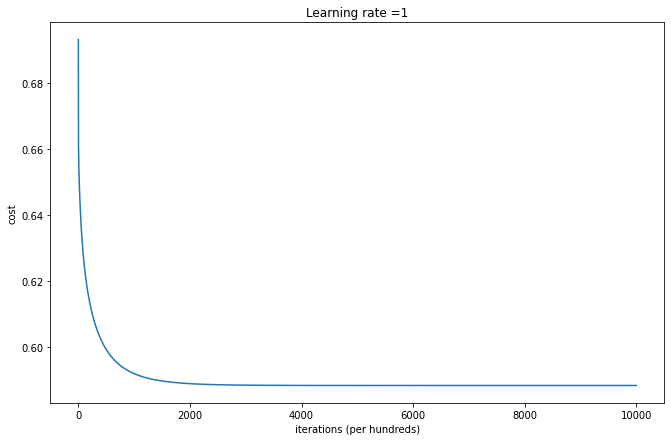

In [36]:
costs = np.squeeze(logmodel_n['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logmodel_n["learning_rate"]))
plt.show()

Here we can see the cost fall and then plateau after 1,000,000 iterations and a learning rate of 1.

## Predicting the test values

In [37]:
df_test = pd.read_csv('test.csv')

In [38]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
#Transforming the data
df_test.Sex = df_test.Sex.replace({'female':0, 'male':1})

df_test.Embarked = df_test.Embarked.apply(transform_embarked)

df_test.Age = df_test[['Age', 'Pclass']].apply(add_age,axis=1)

In [40]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,0


In [41]:
X_s = df_test.drop(columns=['Name', 'Ticket', 'Cabin'])

<AxesSubplot:>

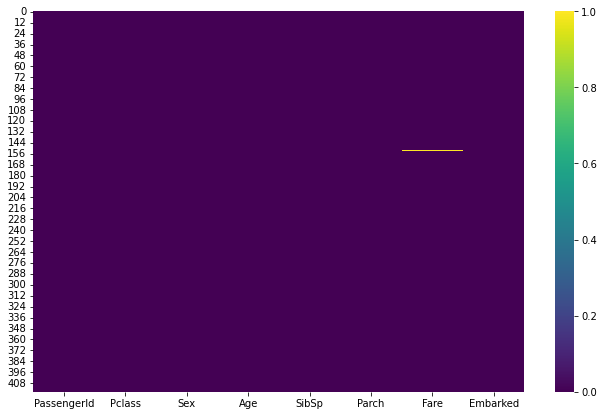

In [42]:
#Turns out there is a missing value for fare
sns.heatmap(X_s.isnull(),cmap='viridis')

In [43]:
#To analyse the case of the missing fare value
X_s[X_s.Fare.isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,1,60.5,0,0,NaN,0


In [44]:
df_temp = df[df['Pclass']==3]
df_temp.Fare[df['Embarked']==0].mean() #The mean of all Pclass passengers going to destination S

14.644083002832863

In [45]:
#The null value has been replaced with 14.6
X_s.Fare[X_s.Fare.isnull()] = 14.6

/var/folders/2_/08fmp8hd5sn41mj0flx0plxh0000gn/T/ipykernel_72166/2736077735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_s.Fare[X_s.Fare.isnull()] = 14.6


<AxesSubplot:>

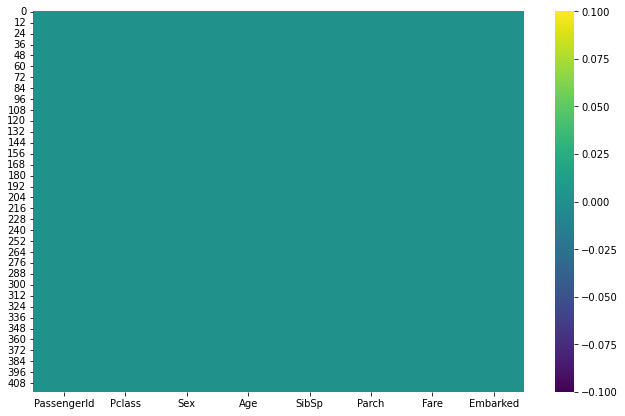

In [46]:
#Double checking to see if there are any more null values
sns.heatmap(X_s.isnull(),cmap='viridis')

In [47]:
#Creating predictions using model trained via Scikit-learn
prediction_test_s = logmodel.predict(X_s)

In [48]:
#Creates a numpy array for X_s dataframe then transform the data
X_n = X_s.values
X_n = (X_n - X_n.mean(axis=1).reshape(418,1))/np.std(X_n,axis=1).reshape(418,1)

In [49]:
#Produces the prediction array from the Numpy model
prediction_test_n = predict(logmodel_n['w'], logmodel_n['b'], X_n)
prediction_test_n = np.squeeze(prediction_test_n.astype(int))

In [50]:
#To create a dataframe including only PassengerId
submission_s = df_test.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name','Ticket','Cabin'],axis=1)
submission_n = df_test.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Name','Ticket','Cabin'],axis=1)

In [51]:
submission_s 

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [52]:
submission_s['Survived'] = prediction_test_s.tolist()
submission_s.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [53]:
submission_s.to_csv('submission using Scikit',index=False) #Submission using the Scikit-learn model

In [54]:
submission_n['Survived'] = prediction_test_n.tolist()
submission_n.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [55]:
submission_n.to_csv('submission using Numpy',index=False) #Submission using the Numpy model

## Results

The model made using Scikit-learn had a score of 77%

The model made using Numpy had a score of 64%

Things to try in the future:
    
    For both models, I could've added regularization to avoid overfitting